In [1]:
import numpy as np
from scipy import stats
from scipy.stats import binom
import math
path = '/Users/Manav/Documents/Hot Hand Paper/Papanicolaou Shot Charts/shot_charts_2015.csv' #Data for 2015-2016 season
data = [line.strip().split(',') for line in open(path)]

In [2]:
data[0]

['GRID_TYPE',
 'GAME_ID',
 'GAME_EVENT_ID',
 'PLAYER_ID',
 'PLAYER_NAME',
 'TEAM_ID',
 'TEAM_NAME',
 'PERIOD',
 'MINUTES_REMAINING',
 'SECONDS_REMAINING',
 'EVENT_TYPE',
 'ACTION_TYPE',
 'SHOT_TYPE',
 'SHOT_ZONE_BASIC',
 'SHOT_ZONE_AREA',
 'SHOT_ZONE_RANGE',
 'SHOT_DISTANCE',
 'LOC_X',
 'LOC_Y',
 'SHOT_ATTEMPTED_FLAG',
 'SHOT_MADE_FLAG',
 'GAME_DATE',
 'HTM',
 'VTM']

In [3]:
data[1]

['Shot Chart Detail',
 '21500001',
 '2.0',
 '203083.0',
 'Andre Drummond',
 '1610612765.0',
 'Detroit Pistons',
 '1.0',
 '11.0',
 '41.0',
 'Missed Shot',
 'Driving Layup Shot',
 '2PT Field Goal',
 'Restricted Area',
 'Center(C)',
 'Less Than 8 ft.',
 '1.0',
 '-17.0',
 '-6.0',
 '1.0',
 '0.0',
 '20151027',
 'ATL',
 'DET']

In [4]:
data[12345]

['Shot Chart Detail',
 '21500076',
 '479.0',
 '1626179.0',
 'Terry Rozier',
 '1610612738.0',
 'Boston Celtics',
 '4.0',
 '6.0',
 '43.0',
 'Missed Shot',
 'Floating Jump shot',
 '2PT Field Goal',
 'In The Paint (Non-RA)',
 'Right Side(R)',
 '8-16 ft.',
 '8.0',
 '63.0',
 '57.0',
 '1.0',
 '0.0',
 '20151106',
 'BOS',
 'WAS']

In [5]:
len(data)

198464

In [6]:
import pandas as pd
columns = range(2, 19)
columns = [i * 5 for i in columns]
column_names = [str(i) + '%' for i in columns]
indices = ['Russell Westbrook', 'DeMar DeRozan', 'Anthony Davis', 'Damian Lillard', 'DeMarcus Cousins', 'Kyrie Irving', 'Andrew Wiggins', 'Isaiah Thomas', 'James Harden', 'John Wall', 'LeBron James', 'Carmelo Anthony', 'Devin Booker', 'Kemba Walker', 'Stephen Curry', 'Paul George', 'C.J. McCollum', 'Karl-Anthony Towns', 'Kawhi Leonard', 'Bradley Beal', 'Klay Thompson', 'Kevin Durant', 'Jimmy Butler', 'Harrison Barnes', 'Gordon Hayward', 'Blake Griffin', 'Jabari Parker', 'Giannis Antetokounmpo', 'Dwyane Wade', 'Eric Bledsoe', 'Brook Lopez', 'Dennis Schroder', 'Marc Gasol', 'Goran Dragic', 'Derrick Rose', 'Zach LaVine', 'Kristaps Porzingis', 'Kyle Lowry', 'Mike Conley', 'LaMarcus Aldridge', 'Avery Bradley', 'Paul Millsap']
quantile_p_values_df = pd.DataFrame(np.nan, index = indices, columns = column_names)

In [7]:
quantile_p_values_df

,10%,15%,20%,25%,30%,35%,40%,45%,50%,55%,60%,65%,70%,75%,80%,85%,90%
Russell Westbrook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeMar DeRozan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Anthony Davis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Damian Lillard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeMarcus Cousins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kyrie Irving,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andrew Wiggins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Isaiah Thomas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
James Harden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
John Wall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
def game_shots(game_id): #creates list of (consecutive) rows in data set that pertain to a particular game
    game_shot_set = []
    for i in range(1, len(data)):
        if int(data[i][1]) == game_id: #because game IDs are stored in the second column of the data set
            game_shot_set.append(data[i])
    return game_shot_set
def curry_shot_strings(player, team): #creates list of player's shot sequences (named after Curry merely because he was the first player analyzed)
    stephen_curry_shot_strings = [] #initializes list of lists of shots (for each game)
    for i in range(int(data[1][1]), int(data[len(data)-1][1]) + 1): #for each game
        curry_game_shot_string = [] #initializes list of shots for particular game
        game_shot_set = game_shots(i) #creates list of shot data for game
        if game_shot_set[0][22] == team or game_shot_set[0][23] == team: #if player's team is playing
            for n in range(0, len(game_shot_set)): #for each shot in the game
                if game_shot_set[n][4] == player: #if player took the shot
                    curry_game_shot_string.append(int(float(game_shot_set[n][20]))) #adds shot value to string of shots in game
            stephen_curry_shot_strings.append(curry_game_shot_string) #adds list of shots in game to total list of lists
    no_shots = 0
    for l in range(0, len(stephen_curry_shot_strings)):
        if stephen_curry_shot_strings[l] == []: #if player did not take any shots in the game
            no_shots += 1
    for j in range(no_shots):
        stephen_curry_shot_strings.remove([]) #removes games in which player took no shots (most likely due to absence)
    return stephen_curry_shot_strings #returns list of lists of shots the output
player_name = 'Russell Westbrook'
team_name = 'OKC'
stephen_curry_shot_strings = curry_shot_strings(player_name, team_name) #stores list of shot sequences for specified player

In [10]:
stephen_curry_shot_strings

[[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0],
 [0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0],
 [0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0],
 [1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0],
 [0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1],
 [0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
 [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1],
 [0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0],
 [1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0],
 [0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0]

In [11]:
len(stephen_curry_shot_strings) #number of games Westbrook played in 2015-2016 season

80

In [12]:
def list_classification_by_length(shot_sequence_length): #creates list of player's shot sequences of a given length
    lengths = []
    for i in range(len(stephen_curry_shot_strings)):
        if len(stephen_curry_shot_strings[i]) == shot_sequence_length:
            lengths.append(stephen_curry_shot_strings[i])
    return lengths
def find_lengths(): #determines the shot sequence lengths for player throughout the season
    lengths = []
    for i in range(len(stephen_curry_shot_strings)):
        number = lengths.count(len(stephen_curry_shot_strings[i]))
        if number == 0:
            lengths.append(int(len(stephen_curry_shot_strings[i])))
    return lengths
def curry_hit_fraction(): #calculates player's season-long hit fraction
    hits = 0
    shots = 0
    for i in range(len(stephen_curry_shot_strings)):
        hits = hits + stephen_curry_shot_strings[i].count(1)
    for i in range(len(stephen_curry_shot_strings)):
        shots = shots + len(stephen_curry_shot_strings[i])
    hit_fraction = float(hits) / float(shots)
    return hit_fraction
shot_percentage = curry_hit_fraction()

In [13]:
shot_percentage #Westbrook's season-long hit fraction in 2015-2016 season (for field goals)

0.45429362880886426

In [14]:
def find_p_values(): #creates list of p-values by calculating p-values for each game played
    shot_percentage = curry_hit_fraction()
    p_values = []
    for i in range(len(stephen_curry_shot_strings)):
        shot_sequence_length = len(stephen_curry_shot_strings[i])
        hits = stephen_curry_shot_strings[i].count(1)
        p_value = 1 - binom.cdf(k = hits - 1, n = shot_sequence_length, p = shot_percentage)
        p_values.append(p_value)
    return p_values

In [15]:
find_p_values()

[0.32847676479807375,
 0.47858191081649326,
 0.36817299593829023,
 0.13144567772331162,
 0.81374203538610734,
 0.78509569060096063,
 0.60082211005813657,
 0.72192929578560383,
 0.85755720848852468,
 0.98280939878637608,
 0.037221073134234062,
 0.19449067719787483,
 0.84068792111499657,
 0.25880702686967783,
 0.50675432004626531,
 0.13144567772331162,
 0.84080038017490233,
 0.56294645329770987,
 0.62266781821861394,
 0.36817299593829023,
 0.1585830446395109,
 0.54003389780751632,
 0.69645776578289342,
 0.87509873556409645,
 0.88616398418755804,
 0.26476227207257708,
 0.61406839121247581,
 0.63223536377070411,
 0.34289133837799279,
 0.79180410591723771,
 0.13590880180542264,
 0.58103107581916558,
 0.093336212283763986,
 0.96047077457414176,
 0.98313123166234262,
 0.72192929578560383,
 0.56294645329770987,
 0.83680114674483319,
 0.3591449509563186,
 1.0,
 0.27077231177620265,
 0.91992108563741881,
 0.58103107581916558,
 0.84080038017490233,
 0.69645776578289342,
 0.61396921700557172,
 0.2

In [16]:
sorted(find_p_values()) #Westbrook's p-values in 2015-2016 season in ascending order

[0.037221073134234062,
 0.092547221119702705,
 0.093336212283763986,
 0.10363670461822871,
 0.13144567772331162,
 0.13144567772331162,
 0.13144567772331162,
 0.13590880180542264,
 0.1585830446395109,
 0.18143470938402739,
 0.18719409267794307,
 0.19089502174684858,
 0.19317701081304695,
 0.19449067719787483,
 0.25560659338681724,
 0.25880702686967783,
 0.26476227207257708,
 0.26476227207257708,
 0.26476227207257708,
 0.26941165537793466,
 0.27077231177620265,
 0.32847676479807375,
 0.34289133837799279,
 0.3591449509563186,
 0.3591449509563186,
 0.36817299593829023,
 0.36817299593829023,
 0.36817299593829023,
 0.45096000927838409,
 0.47858191081649326,
 0.50675432004626531,
 0.54003389780751632,
 0.54003389780751632,
 0.56125004884818264,
 0.56125004884818264,
 0.56294645329770987,
 0.56294645329770987,
 0.58103107581916558,
 0.58103107581916558,
 0.60082211005813657,
 0.61396921700557172,
 0.61406839121247581,
 0.62266781821861394,
 0.62266781821861394,
 0.63223536377070411,
 0.6484874

In [17]:
def binom_p_value_simulation(shot_sequence_length, simulation_count): #draws "simulation_count" times from binomial distribution with n = shot_sequence_length, calculates and returns p-value for each draw
    hit_simulations = np.random.binomial(n = shot_sequence_length, p = shot_percentage, size = simulation_count)
    p_value_simulations = []
    for i in range(len(hit_simulations)):
        p_value = 1 - binom.cdf(k = hit_simulations[i] - 1, n = shot_sequence_length, p = shot_percentage) #p-value is probability of making the same number or more shots than made in simulation
        p_value_simulations.append(p_value)
    return p_value_simulations
def weighted_binom_p_value_simulation(shot_sequence_length, overall_simulation_count): #runs simulation for n = shot_sequence_length proportionally, with respect to the total number of game simulations (overall_simulation_count), as the fraction of games in which the player took n shots 
    weight = float(len(list_classification_by_length(shot_sequence_length))) / float(len(stephen_curry_shot_strings))
    simulation_count = int(round((weight * overall_simulation_count), 0))
    weighted_binom_p_value_simulations = binom_p_value_simulation(shot_sequence_length, simulation_count)
    return weighted_binom_p_value_simulations
def overall_p_value_simulation(overall_simulation_count): #runs season simulation by simulating p-values for all shot sequence lengths a proportional number of times with respect to overall_simulation_count
    overall_p_value_simulation = []
    lengths = find_lengths()
    for i in range(len(lengths)):
        overall_p_value_simulation.extend(weighted_binom_p_value_simulation(lengths[i], overall_simulation_count))
    overall_p_value_simulation = sorted(overall_p_value_simulation)
    return overall_p_value_simulation
def repeated_overall_p_value_simulation(overall_simulation_count, repetitions): #runs "repetitions" season simulations
    overall_p_value_simulations = []
    for i in range(repetitions):	overall_p_value_simulations.append(overall_p_value_simulation(overall_simulation_count))
    return overall_p_value_simulations
player_p_value_dist = sorted(find_p_values()) #organizes player_p_value_dist in ascending order for easy quantile identification
def x_pct_quantile(p_value_dist, x): #finds x% quantile of a distribution by locating the correct index and finding p-value at that index
    index = int(math.ceil((x / 100.0) * len(p_value_dist) - 1))
    x_pct_quantile = p_value_dist[index]
    return x_pct_quantile
def simulated_x_pct_quantile_dist(overall_simulation_count, repetitions, x): #simulates distribution of x% quantiles by finding x% quantiles of "repetitions" season p-value simulations
    overall_p_value_simulations = repeated_overall_p_value_simulation(overall_simulation_count, repetitions)
    x_pct_quantile_dist = []
    for i in range(len(overall_p_value_simulations)):
        x_pct_quantile_dist.append(x_pct_quantile(overall_p_value_simulations[i], x))
    return x_pct_quantile_dist
def actual_x_pct_quantile(x): #determines player's x% quantile
    return x_pct_quantile(player_p_value_dist, x)
def x_pct_quantile_p_value(x): #finds player's x% quantile p-value by comparing player's x% quantile with 30,000 x% quantile simulations
    repetitions = 30000
    overall_simulation_count = len(stephen_curry_shot_strings) #each season simulation has the same number of games as the player played in the season
    simulated_x_pct_quantiles = simulated_x_pct_quantile_dist(overall_simulation_count, repetitions, x)
    player_x_pct_quantile = actual_x_pct_quantile(x)
    less_than = 0
    number_of_x_pct_quantiles = len(simulated_x_pct_quantiles)
    for i in range(len(simulated_x_pct_quantiles)):
        if simulated_x_pct_quantiles[i] < player_x_pct_quantile:
            less_than += 1
    p_value = float(less_than) / float(number_of_x_pct_quantiles) #returns fraction of simulated x% quantiles less than player's x% quantile
    return p_value

In [18]:
quantile_p_values_df.at[player_name, '10%'] = x_pct_quantile_p_value(10) #places Westbrook's 10% quantile p-value in Westbrook's row under "10%" 
quantile_p_values_df.at[player_name, '15%'] = x_pct_quantile_p_value(15)
quantile_p_values_df.at[player_name, '20%'] = x_pct_quantile_p_value(20)
quantile_p_values_df.at[player_name, '25%'] = x_pct_quantile_p_value(25)
quantile_p_values_df.at[player_name, '30%'] = x_pct_quantile_p_value(30)
quantile_p_values_df.at[player_name, '35%'] = x_pct_quantile_p_value(35) #for full table, repeate process for all quantiles of all players

In [19]:
quantile_p_values_df

,10%,15%,20%,25%,30%,35%,40%,45%,50%,55%,60%,65%,70%,75%,80%,85%,90%
Russell Westbrook,0.3799,0.2577,0.305,0.226633,0.307433,0.1266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeMar DeRozan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Anthony Davis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Damian Lillard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeMarcus Cousins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kyrie Irving,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andrew Wiggins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Isaiah Thomas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
James Harden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
John Wall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
quantile_p_values_df.to_csv("/Users/Manav/Desktop/2015-2016 Example Quantile p-value DF.csv") #saves dataframe as .csv file 

In [21]:
#same code as above, but switches player to DeMarcus Cousins instead of Russell Westbrook
player_name = 'DeMarcus Cousins'
team_name = 'SAC'
stephen_curry_shot_strings = curry_shot_strings(player_name, team_name) #stores list of shot sequences for specified player

def list_classification_by_length(shot_sequence_length): #creates list of player's shot sequences of a given length
    lengths = []
    for i in range(len(stephen_curry_shot_strings)):
        if len(stephen_curry_shot_strings[i]) == shot_sequence_length:
            lengths.append(stephen_curry_shot_strings[i])
    return lengths
def find_lengths(): #determines the shot sequence lengths for player throughout the season
    lengths = []
    for i in range(len(stephen_curry_shot_strings)):
        number = lengths.count(len(stephen_curry_shot_strings[i]))
        if number == 0:
            lengths.append(int(len(stephen_curry_shot_strings[i])))
    return lengths
def curry_hit_fraction(): #calculates player's season-long hit fraction
    hits = 0
    shots = 0
    for i in range(len(stephen_curry_shot_strings)):
        hits = hits + stephen_curry_shot_strings[i].count(1)
    for i in range(len(stephen_curry_shot_strings)):
        shots = shots + len(stephen_curry_shot_strings[i])
    hit_fraction = float(hits) / float(shots)
    return hit_fraction
shot_percentage = curry_hit_fraction()
def binom_p_value_simulation(shot_sequence_length, simulation_count): #draws "simulation_count" times from binomial distribution with n = shot_sequence_length, calculates and returns p-value for each draw
    hit_simulations = np.random.binomial(n = shot_sequence_length, p = shot_percentage, size = simulation_count)
    p_value_simulations = []
    for i in range(len(hit_simulations)):
        p_value = 1 - binom.cdf(k = hit_simulations[i] - 1, n = shot_sequence_length, p = shot_percentage) #p-value is probability of making the same number or more shots than made in simulation
        p_value_simulations.append(p_value)
    return p_value_simulations
def weighted_binom_p_value_simulation(shot_sequence_length, overall_simulation_count): #runs simulation for n = shot_sequence_length proportionally, with respect to the total number of game simulations (overall_simulation_count), as the fraction of games in which the player took n shots 
    weight = float(len(list_classification_by_length(shot_sequence_length))) / float(len(stephen_curry_shot_strings))
    simulation_count = int(round((weight * overall_simulation_count), 0))
    weighted_binom_p_value_simulations = binom_p_value_simulation(shot_sequence_length, simulation_count)
    return weighted_binom_p_value_simulations
def overall_p_value_simulation(overall_simulation_count): #runs season simulation by simulating p-values for all shot sequence lengths a proportional number of times with respect to overall_simulation_count
    overall_p_value_simulation = []
    lengths = find_lengths()
    for i in range(len(lengths)):
        overall_p_value_simulation.extend(weighted_binom_p_value_simulation(lengths[i], overall_simulation_count))
    overall_p_value_simulation = sorted(overall_p_value_simulation)
    return overall_p_value_simulation
def repeated_overall_p_value_simulation(overall_simulation_count, repetitions): #runs "repetitions" season simulations
    overall_p_value_simulations = []
    for i in range(repetitions):	overall_p_value_simulations.append(overall_p_value_simulation(overall_simulation_count))
    return overall_p_value_simulations
player_p_value_dist = sorted(find_p_values()) #organizes player_p_value_dist in ascending order for easy quantile identification
def x_pct_quantile(p_value_dist, x): #finds x% quantile of a distribution by locating the correct index and finding p-value at that index
    index = int(math.ceil((x / 100.0) * len(p_value_dist) - 1))
    x_pct_quantile = p_value_dist[index]
    return x_pct_quantile
def simulated_x_pct_quantile_dist(overall_simulation_count, repetitions, x): #simulates distribution of x% quantiles by finding x% quantiles of "repetitions" season p-value simulations
    overall_p_value_simulations = repeated_overall_p_value_simulation(overall_simulation_count, repetitions)
    x_pct_quantile_dist = []
    for i in range(len(overall_p_value_simulations)):
        x_pct_quantile_dist.append(x_pct_quantile(overall_p_value_simulations[i], x))
    return x_pct_quantile_dist
def actual_x_pct_quantile(x): #determines player's x% quantile
    return x_pct_quantile(player_p_value_dist, x)
def x_pct_quantile_p_value(x): #finds player's x% quantile p-value by comparing player's x% quantile with 30,000 x% quantile simulations
    repetitions = 30000
    overall_simulation_count = len(stephen_curry_shot_strings) #each season simulation has the same number of games as the player played in the season
    simulated_x_pct_quantiles = simulated_x_pct_quantile_dist(overall_simulation_count, repetitions, x)
    player_x_pct_quantile = actual_x_pct_quantile(x)
    less_than = 0
    number_of_x_pct_quantiles = len(simulated_x_pct_quantiles)
    for i in range(len(simulated_x_pct_quantiles)):
        if simulated_x_pct_quantiles[i] < player_x_pct_quantile:
            less_than += 1
    p_value = float(less_than) / float(number_of_x_pct_quantiles) #returns fraction of simulated x% quantiles less than player's x% quantile
    return p_value

In [22]:
x_pct_quantile_p_value(90)

0.9154333333333333

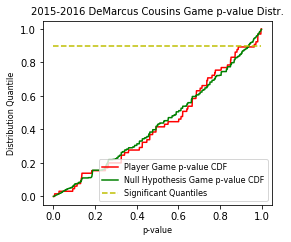

In [25]:
def find_p_values(): #creates list of p-values by calculating p-values for each game played
    shot_percentage = curry_hit_fraction()
    p_values = []
    for i in range(len(stephen_curry_shot_strings)):
        shot_sequence_length = len(stephen_curry_shot_strings[i])
        hits = stephen_curry_shot_strings[i].count(1)
        p_value = 1 - binom.cdf(k = hits - 1, n = shot_sequence_length, p = shot_percentage)
        p_values.append(p_value)
    return p_values
def prob_less_than_p(p_value): #finds the frequency of p-values no greater than a given p-value
    p_values = find_p_values()
    number_of_higher_p_values = 0
    number_of_p_values = len(p_values)
    for i in range(len(p_values)):
        if float(p_values[i]) > p_value:
            number_of_higher_p_values += 1
    prob_greater_than_p = float(number_of_higher_p_values) / float(number_of_p_values)
    prob_less_than_p = 1 - prob_greater_than_p
    return prob_less_than_p
vec_prob_less_than_p = np.vectorize(prob_less_than_p)
def binom_p_value(shot_sequence_length, hits): #finds p-value given hits, a shot sequence length, and p = shot_percentage 
    shot_percentage = curry_hit_fraction()
    p_value = 1 - binom.cdf(k = hits - 1, n = shot_sequence_length, p = shot_percentage)
    return p_value
def find_binom_p_values(shot_sequence_length): #finds and orders list of possible p-values given shot sequence length
    p_values = [0.0]
    for i in range(shot_sequence_length + 1):
        p_value = binom_p_value(shot_sequence_length, i)
        p_values.append(p_value)
    p_values = sorted(p_values) #puts p-values (and 0.0) in ascending order
    return p_values
def binom_p_cdf(shot_sequence_length, p): #finds probability of p-value being less than or equal to a certain "p" in p-value distribution for a particular shot sequence length 
    possible_p_values = find_binom_p_values(shot_sequence_length)
    p_values = []
    if possible_p_values.count(p) == 1: #if p is one of the possible p-values in the distribution
        prob = p #then probability of p-value being less than or equal to p is p
    else:
        p_values.extend(sorted(possible_p_values)) 
        p_values.append(p)
        p_values = sorted(p_values) #sorted list of all possible p-values, and p
        index = p_values.index(p) 
        prob = p_values[index - 1] #probability is value at one index lower than p in the list p_values
    return prob
vec_binom_p_cdf = np.vectorize(binom_p_cdf)
def weighted_binom_p_cdf(shot_sequence_length, p): #multiplies CDF for given shot sequence length by proportion of games in which player had shot sequences of that length
    weight = float(len(list_classification_by_length(shot_sequence_length))) / float(len(stephen_curry_shot_strings))
    prob = weight * binom_p_cdf(shot_sequence_length, p)
    return prob
vec_weighted_binom_p_cdf = np.vectorize(weighted_binom_p_cdf)
def null_hyp_p_cdf(p): #creates mixture of weighted binomial p-value CDFs
    lengths = find_lengths()
    prob = 0
    for i in range(len(lengths)):
        prob += weighted_binom_p_cdf(lengths[i], p)
    return prob
vec_null_hyp_p_cdf = np.vectorize(null_hyp_p_cdf)

import matplotlib.pyplot as plt

plt.figure(figsize=(4.1, 3.39))
p_values = np.arange(0.0, 1.0, 0.001)
prob1 = vec_prob_less_than_p(p_values)
player_p_value_cdf, = plt.plot(p_values, prob1, 'r', label = 'Player Game p-value CDF')
prob2 = vec_null_hyp_p_cdf(p_values)
null_hypothesis, = plt.plot(p_values, prob2, 'g', label = 'Null Hypothesis Game p-value CDF')
quantile1 = [0.9 for i in p_values]
dashed1 = plt.plot(p_values, quantile1, 'y', label = 'Significant Quantiles', linestyle = 'dashed')
plt.xlabel('p-value', fontsize = 8)
plt.ylabel('Distribution Quantile', fontsize = 8)
plt.title('2015-2016 DeMarcus Cousins Game p-value Distr.', fontsize = 10)
plt.legend(fontsize = 8)
plt.savefig('/Users/Manav/Desktop/2015-2016 DeMarcus Cousins Deviation from Null Hypothesis Example')
plt.show()

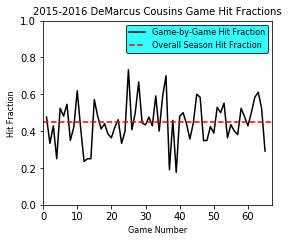

In [28]:
def calculate_game_shot_percentage(game): #calculates hit fraction for a game
    hits = game.count(1)
    shots = len(game)
    shot_percent = float(hits) / float(shots)
    return shot_percent
def average_shooting_percent_line(x): 
    curry_shot_percent = curry_hit_fraction()
    return curry_shot_percent
vec_average_shooting_percent_line = np.vectorize(average_shooting_percent_line)

plt.figure(figsize=(4.1, 3.39))
game_shot_percent_list = []
for i in range(len(stephen_curry_shot_strings)):
    game_shot_percent = calculate_game_shot_percentage(stephen_curry_shot_strings[i])
    game_shot_percent_list.append(game_shot_percent)
games = np.arange(1, len(game_shot_percent_list) + 1)
plt.axis([0, len(game_shot_percent_list) + 2, 0, 1])
plt.xlabel('Game Number', fontsize = 8)
plt.ylabel('Hit Fraction', fontsize = 8)
plt.title('2015-2016 DeMarcus Cousins Game Hit Fractions', fontsize = 10)
x = np.arange(0, len(game_shot_percent_list) + 3, .1)
shot_percent = vec_average_shooting_percent_line(x)
hit_fraction_line, = plt.plot(games, game_shot_percent_list, 'k', label = 'Game-by-Game Hit Fraction')
shot_percent_line, = plt.plot(x, shot_percent, 'r', linestyle = 'dashed', label = 'Overall Season Hit Fraction')
legend = plt.legend(fontsize = 8)
frame = legend.get_frame()
frame.set_facecolor('cyan')
frame.set_edgecolor('black')
plt.savefig('/Users/Manav/Desktop/2015-2016 DeMarcus Cousins Hit Fraction Graph Example')
plt.show()